C:\Users\Samsung\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - loss: 0.0350
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - loss: 0.0029
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - loss: 9.5880e-04
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - loss: 6.7565e-04
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - loss: 8.0248e-04
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - loss: 8.6320e-04
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - loss: 7.9692e-04
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - loss: 7.2731e-04
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - loss: 7.4949e-04
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - loss: 6.7182e-04
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - loss: 7.3294e-04
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - loss: 7.7779e-04
Epoch 13/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step - loss: 8.1447e-04
Epoch 14/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - loss: 6.9264e-04
Epoch 15/

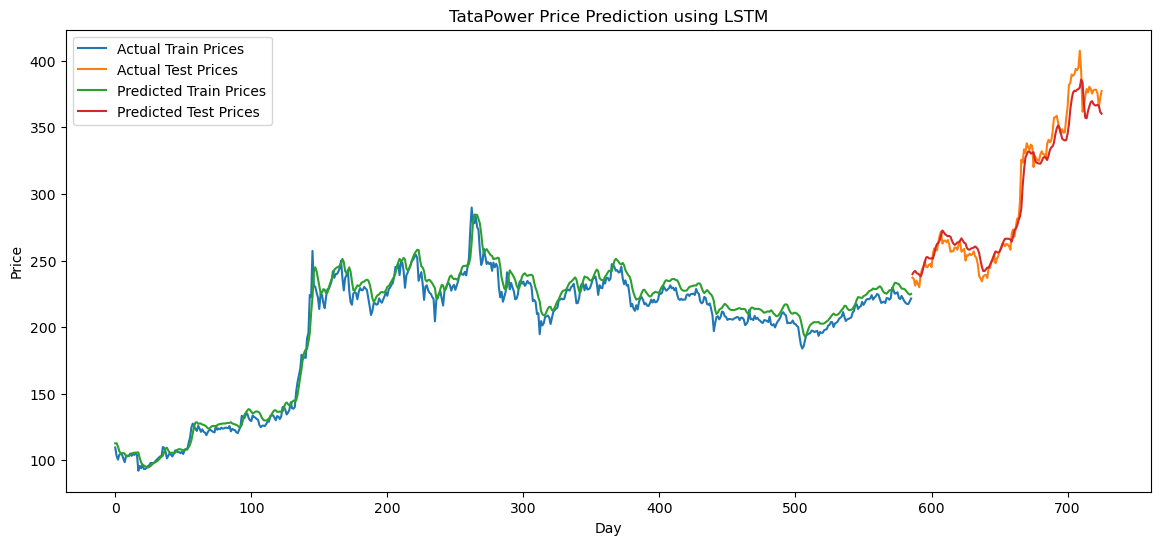

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
# Assuming 'data.csv' contains historical stock prices
data = pd.read_csv(r'C:\Users\Samsung\Downloads\TataPower.csv')

# Use only the 'Close' prices for prediction
prices = data['Close Price'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
prices_normalized = scaler.fit_transform(prices)

# Split data into training and testing sets
train_size = int(len(prices_normalized) * 0.8)
test_size = len(prices_normalized) - train_size
train_data, test_data = prices_normalized[0:train_size,:], prices_normalized[train_size:len(prices_normalized),:]

# Convert the data into sequences
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 10  # Length of the sequences
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Define the LSTM model
model = Sequential([
    LSTM(units=350, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=350),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
x=model.fit(X_train, y_train, epochs=50, batch_size=30)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse normalization of predictions
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

# Plot the results
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(train_predictions)), y_train, label='Actual Train Prices')
plt.plot(np.arange(len(train_predictions), len(train_predictions) + len(test_predictions)), y_test, label='Actual Test Prices')
plt.plot(np.arange(len(train_predictions)), train_predictions, label='Predicted Train Prices')
plt.plot(np.arange(len(train_predictions), len(train_predictions) + len(test_predictions)), test_predictions, label='Predicted Test Prices')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('TataPower Price Prediction using LSTM')
plt.legend()
plt.show()


mse = mean_squared_error(test_predictions, y_test)

In [20]:
mse

95.78349084092643

In [3]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_data[10::], y_test)
print(mse)

91353.55417900336


Text(0, 0.5, 'Price')

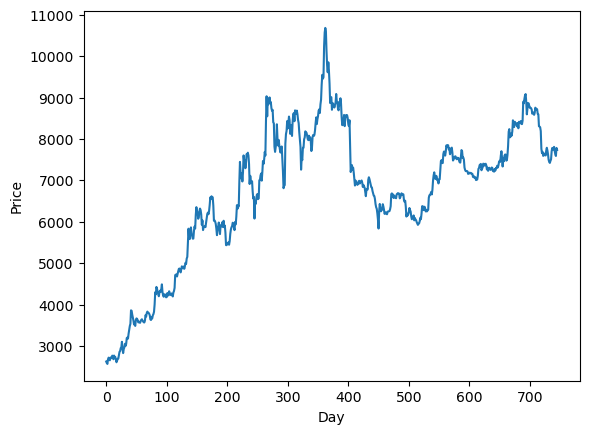

In [12]:
data = pd.read_csv(r'C:\Users\Samsung\Downloads\TataElx.csv')

# Use only the 'Close' prices for prediction
prices = data['Close Price'].values.reshape(-1, 1)
plt.plot(prices)
plt.xlabel('Day')
plt.ylabel('Price')


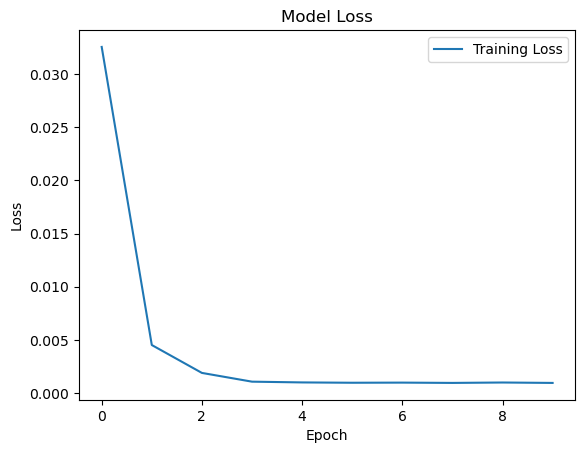

In [8]:
plt.plot(x.history['loss'], label='Training Loss')
#plt.plot(x.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/20


C:\Users\Samsung\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0554
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0057
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0018
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0015
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0012
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0012
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0012
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0013
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0012
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0014
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0011
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0011
Epoch 13/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0011
Epoch 14/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0011
Epoch 15/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0012
Epoch 16/20
20/

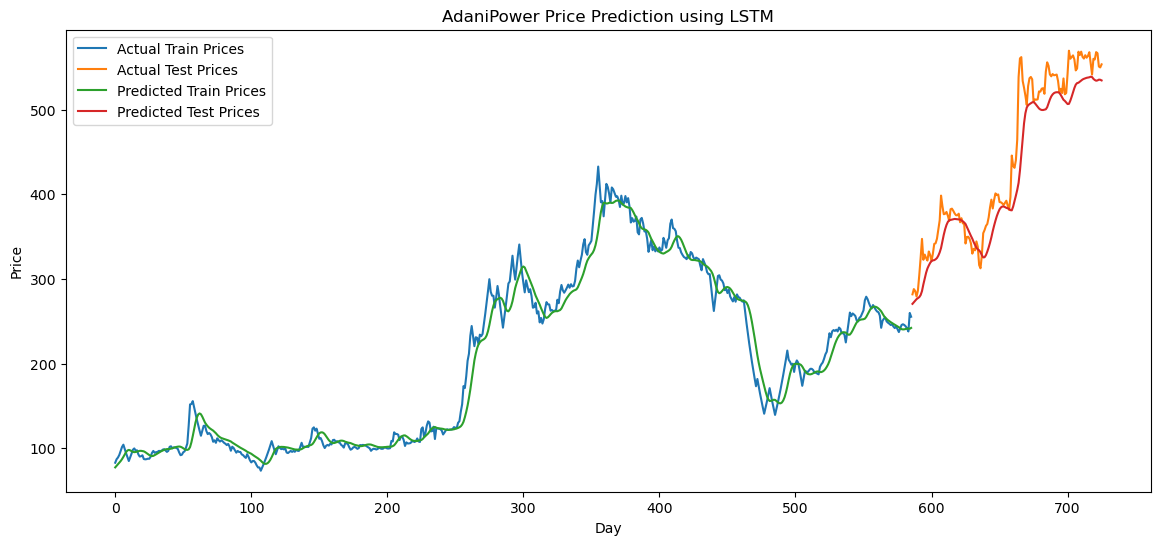

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
# Assuming 'data.csv' contains historical stock prices
data = pd.read_csv(r'C:\Users\Samsung\Downloads\AdaniPower.csv')

# Use only the 'Close' prices for prediction
prices = data['Close Price'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
prices_normalized = scaler.fit_transform(prices)

# Split data into training and testing sets
train_size = int(len(prices_normalized) * 0.8)
test_size = len(prices_normalized) - train_size
train_data, test_data = prices_normalized[0:train_size,:],prices_normalized[train_size:len(prices_normalized),:]

# Convert the data into sequences
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 10  # Length of the sequences
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Define the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=50),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
x=model.fit(X_train, y_train, epochs=20, batch_size=30)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse normalization of predictions
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

# Plot the results
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(train_predictions)), y_train, label='Actual Train Prices')
plt.plot(np.arange(len(train_predictions), len(train_predictions) + len(test_predictions)), y_test, label='Actual Test Prices')
plt.plot(np.arange(len(train_predictions)), train_predictions, label='Predicted Train Prices')
plt.plot(np.arange(len(train_predictions), len(train_predictions) + len(test_predictions)), test_predictions, label='Predicted Test Prices')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('AdaniPower Price Prediction using LSTM')
plt.legend()
plt.show()


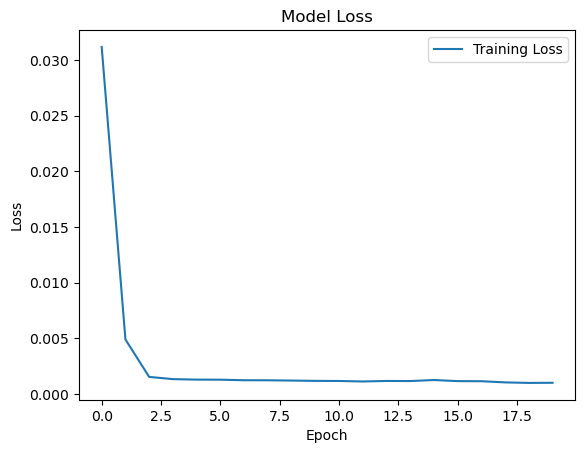

In [5]:
plt.plot(x.history['loss'], label='Training Loss')
#plt.plot(x.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/30


C:\Users\Samsung\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.1601
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0088
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0046
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0028
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0024
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0022
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0023
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0022
Epoch 9/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0021
Epoch 10/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0022
Epoch 11/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0021
Epoch 12/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0023
Epoch 13/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0019
Epoch 14/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0021
Epoch 15/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0022
Epoch 16/30
19/

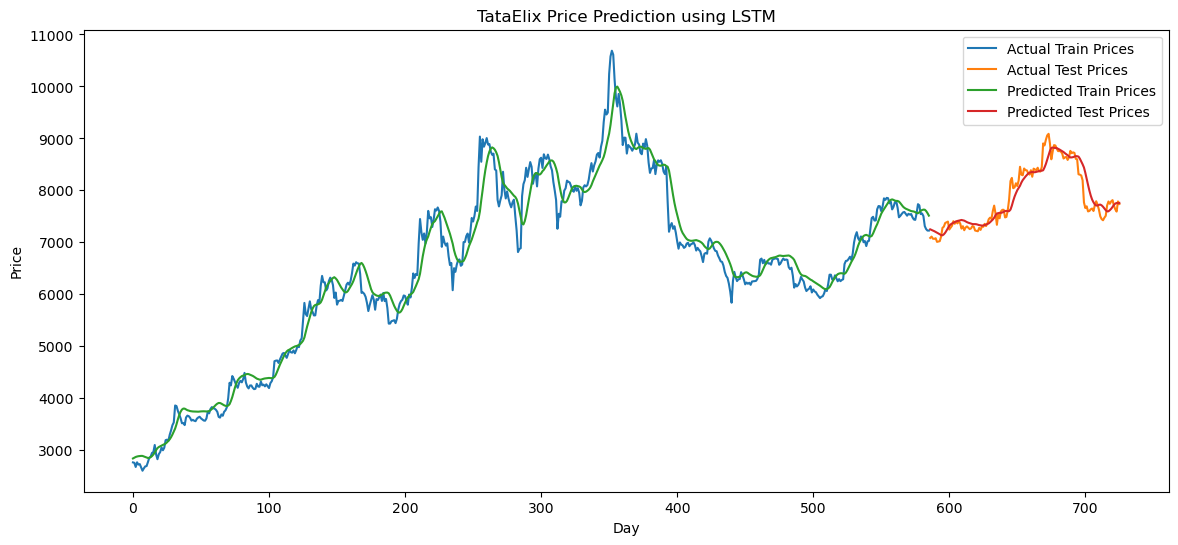

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
# Assuming 'data.csv' contains historical stock prices
data = pd.read_csv(r'C:\Users\Samsung\Downloads\TataElx.csv')

# Use only the 'Close' prices for prediction
prices = data['Close Price'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
prices_normalized = scaler.fit_transform(prices)

# Split data into training and testing sets
train_size = int(len(prices_normalized) * 0.8)
test_size = len(prices_normalized) - train_size
train_data, test_data = prices_normalized[0:train_size,:],prices_normalized[train_size:len(prices_normalized),:]

# Convert the data into sequences
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 10  # Length of the sequences
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Define the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=50),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
x=model.fit(X_train, y_train, epochs=30, batch_size=32)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse normalization of predictions
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

# Plot the results
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(train_predictions)), y_train, label='Actual Train Prices')
plt.plot(np.arange(len(train_predictions), len(train_predictions) + len(test_predictions)), y_test, label='Actual Test Prices')
plt.plot(np.arange(len(train_predictions)), train_predictions, label='Predicted Train Prices')
plt.plot(np.arange(len(train_predictions), len(train_predictions) + len(test_predictions)), test_predictions, label='Predicted Test Prices')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('TataElix Price Prediction using LSTM')
plt.legend()
plt.show()


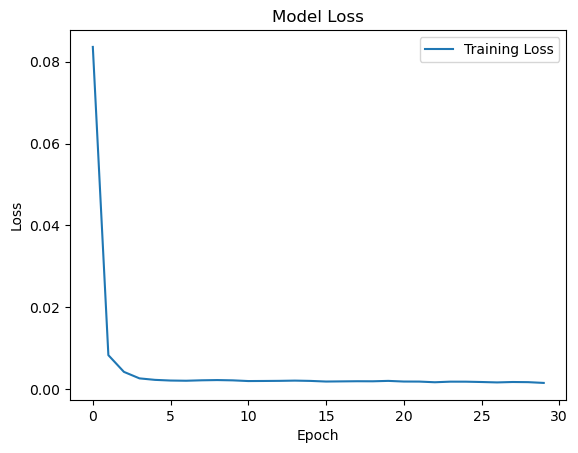

In [7]:
plt.plot(x.history['loss'], label='Training Loss')
#plt.plot(x.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

C:\Users\Samsung\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\Samsung\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 188ms/step - loss: 0.0160
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 175ms/step - loss: 6.6314e-04
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - loss: 4.7705e-04
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step - loss: 4.5878e-04
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 187ms/step - loss: 4.8043e-04
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 205ms/step - loss: 4.7901e-04
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - loss: 4.3711e-04
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 206ms/step - loss: 4.1844e-04
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - loss: 5.2316e-04
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - loss: 4.2754e-04
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 186ms/step - loss: 4.9052e-04
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 197ms/step - loss: 3.9024e-04
Epoch 13/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - loss: 3.5045e-04
Epoch 14/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 194ms/step - loss: 3.0300e-04
E

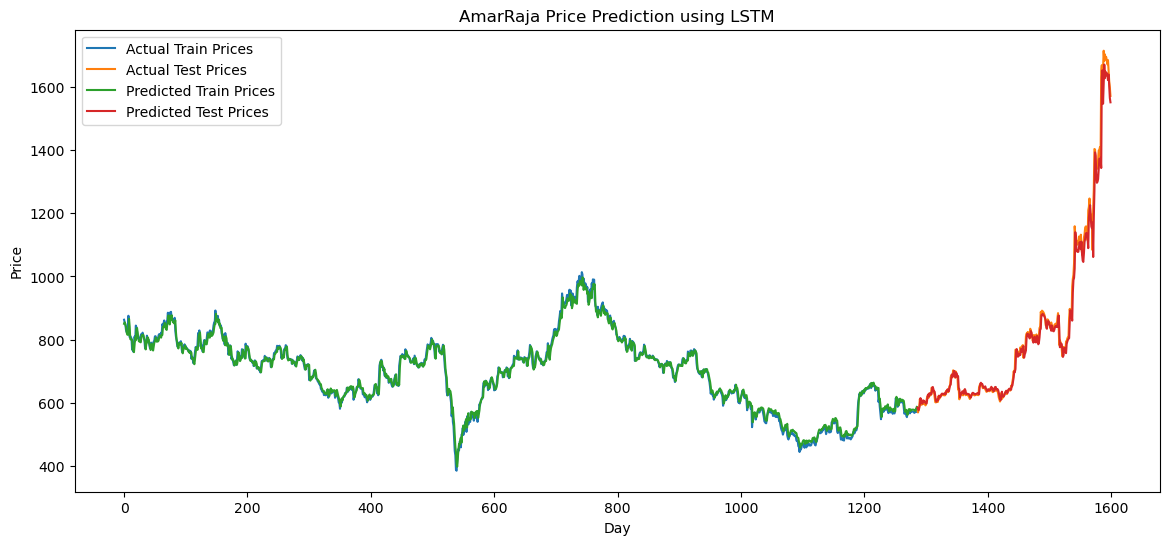

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout

# Load the dataset
# Assuming 'data.csv' contains historical stock prices
data = pd.read_csv(r'C:\Users\Samsung\Downloads\Amaraja_stock.csv')

# Used only the 'Close' prices for prediction
prices = data['Close Price'].values.reshape(-1, 1)

# Normalized the data
scaler = MinMaxScaler(feature_range=(0, 1))
prices_normalized = scaler.fit_transform(prices)

# Split data into training and testing sets
train_size = int(len(prices_normalized) * 0.8)
test_size = len(prices_normalized) - train_size
train_data, test_data = prices_normalized[0:train_size,:],prices_normalized[train_size:len(prices_normalized),:]

# Convert the data into sequences
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 10  # Length of the sequences
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Define the LSTM model
model = Sequential([
    LSTM(units=300, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
  
    LSTM(units=300,return_sequences=True),
  
    LSTM(units=300),

    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
x=model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse normalization of predictions
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)


mse = model.evaluate(test_predictions, y_test)
print("Mean Squared Error:", mse)

# Plot the results
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(train_predictions)), y_train, label='Actual Train Prices')
plt.plot(np.arange(len(train_predictions), len(train_predictions) + len(test_predictions)), y_test, label='Actual Test Prices')
plt.plot(np.arange(len(train_predictions)), train_predictions, label='Predicted Train Prices')
plt.plot(np.arange(len(train_predictions), len(train_predictions) + len(test_predictions)), test_predictions, label='Predicted Test Prices')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('AmarRaja Price Prediction using LSTM')
plt.legend()
plt.show()


In [3]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Example manually entered sequence (replace with actual values)
manual_input_sequence = [1688.65,1693.8,1683.25,1670.7,1683.7,1650.15,1615.75,1597.65,1570.45,1566.30] 

# Convert to numpy array and reshape
manual_input_sequence = np.array(manual_input_sequence).reshape(-1, 1)

# Normalize the input using the same scaler used during training
manual_input_normalized = scaler.transform(manual_input_sequence)

# Reshape the input to fit the model's expected input shape
manual_input_normalized = manual_input_normalized.reshape(1, sequence_length, 1)  # (samples, timesteps, features)

# Predict the outcome
predicted_normalized = model.predict(manual_input_normalized)

# Inverse transform the predicted outcome to get the original scale
predicted_outcome = scaler.inverse_transform(predicted_normalized)

print(f'Predicted Outcome: {predicted_outcome[0][0]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Outcome: 1526.364501953125


In [4]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error( y_test,test_predictions)
print(mse)

1052.2643557425429


In [5]:
mape = np.mean(np.abs((y_test - test_predictions) /y_test)) * 100
mape

1.7616530789491203

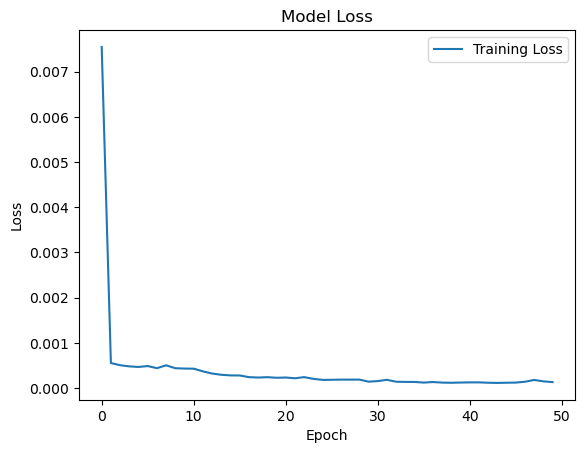

In [6]:
plt.plot(x.history['loss'], label='Training Loss')
#plt.plot(x.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error( y_test,test_predictions)
print(mse)


1052.2643557425429


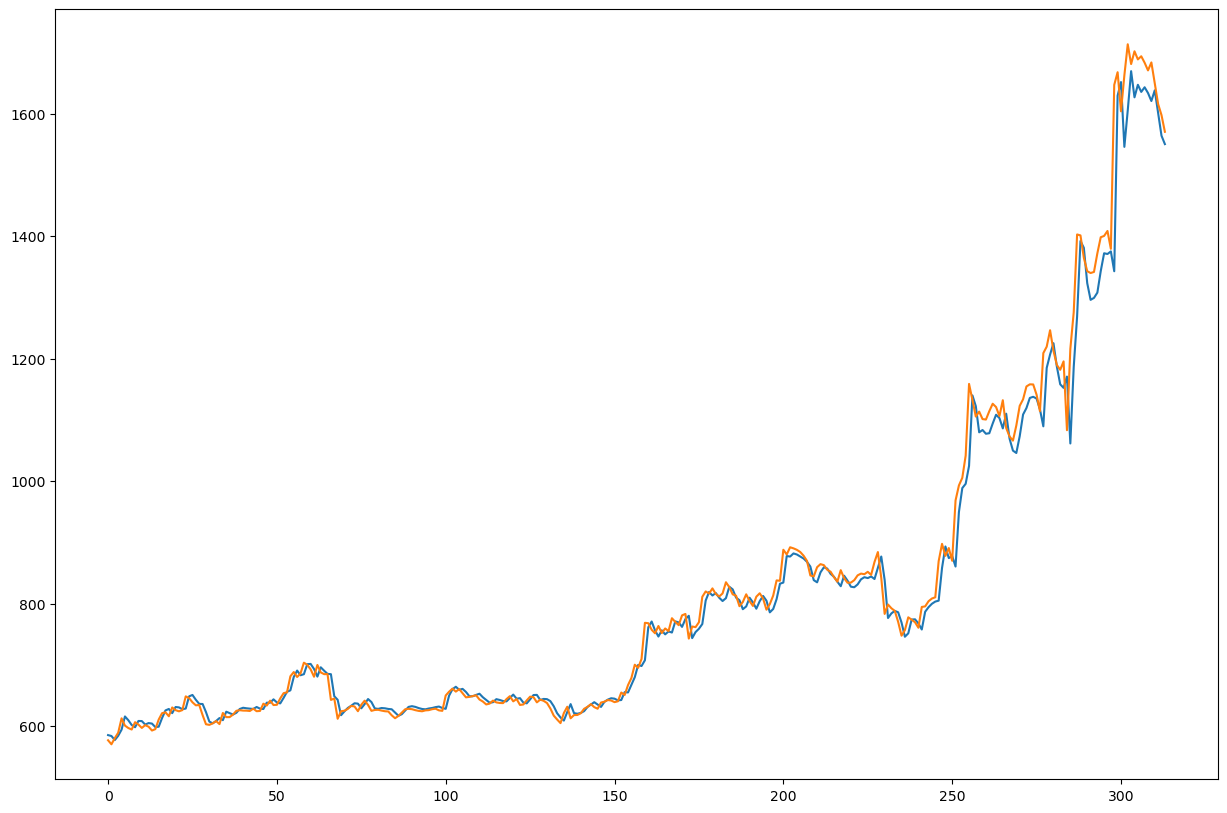

In [12]:
plt.figure(figsize=(15,10))
plt.plot(test_predictions)
plt.plot(y_test)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
# Load the dataset
data = pd.read_csv(r'C:\Users\Samsung\Downloads\tata_stock.csv')

# Use relevant columns for prediction
features = data[['Open Price','High Price','Low Price', 'Close Price']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
features_normalized = scaler.fit_transform(features)

# Split data into training and testing sets
train_size = int(len(features_normalized) * 0.8)
test_size = len(features_normalized) - train_size
train_data, test_data = features_normalized[0:train_size, :], features_normalized[train_size:len(features_normalized), :]

# Convert the data into sequences
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length, -1])  # Use the Close Price as the target
    return np.array(X), np.array(y)

sequence_length = 10  # Length of the sequences
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Define the LSTM model
model = Sequential([
    LSTM(units=500, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=500, return_sequences=True),
    Dropout(0.2),
    LSTM(units=500),
    Dropout(0.2),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

callback=EarlyStopping(monitor="val_loss",min_delta=0.00001,patience=0,verbose=1,mode="auto",baseline=None,restore_best_weights=False)
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32,callbacks=callback)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse normalization of predictions
train_predictions = scaler.inverse_transform(np.concatenate((train_data[sequence_length:, :-1], train_predictions), axis=1))[:, -1]
y_train = scaler.inverse_transform(np.concatenate((train_data[sequence_length:, :-1], y_train.reshape(-1, 1)), axis=1))[:, -1]
test_predictions = scaler.inverse_transform(np.concatenate((test_data[sequence_length:, :-1], test_predictions), axis=1))[:, -1]
y_test = scaler.inverse_transform(np.concatenate((test_data[sequence_length:, :-1], y_test.reshape(-1, 1)), axis=1))[:, -1]



C:\Users\Samsung\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\Samsung\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 406ms/step - loss: 0.0498
Epoch 2/50


C:\Users\Samsung\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 404ms/step - loss: 0.0022
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 406ms/step - loss: 7.9162e-04
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 456ms/step - loss: 6.5431e-04
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 452ms/step - loss: 7.4323e-04
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 444ms/step - loss: 7.1896e-04
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 473ms/step - loss: 6.3457e-04
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 500ms/step - loss: 8.1957e-04
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 451ms/step - loss: 7.0975e-04
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 533ms/step - loss: 6.3160e-04
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 464ms/step - loss: 7.5341e-04
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 483ms/step - loss: 7.7811e-04
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 408ms/step - loss: 7.9620e-04
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 451ms/step - loss: 7.6176e-04
Epoch 15/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 490ms/step - loss: 7.2743e-04
E

Mean Squared Error: 1388.2939812767115


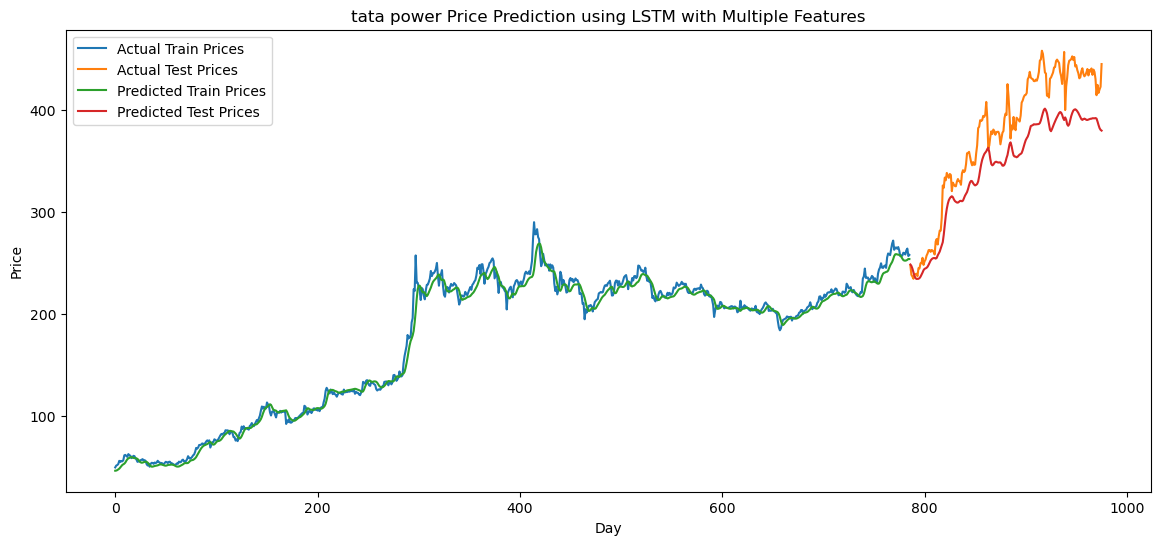

In [2]:
from sklearn.metrics import mean_squared_error
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, test_predictions)
print("Mean Squared Error:", mse)

# Plot the results
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(train_predictions)), y_train, label='Actual Train Prices')
plt.plot(np.arange(len(train_predictions), len(train_predictions) + len(test_predictions)), y_test, label='Actual Test Prices')
plt.plot(np.arange(len(train_predictions)), train_predictions, label='Predicted Train Prices')
plt.plot(np.arange(len(train_predictions), len(train_predictions) + len(test_predictions)), test_predictions, label='Predicted Test Prices')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('tata power Price Prediction using LSTM with Multiple Features')
plt.legend()
plt.show()


In [3]:
mape = np.mean(np.abs((y_test - test_predictions) /y_test)) * 100
mape

8.442626855318272

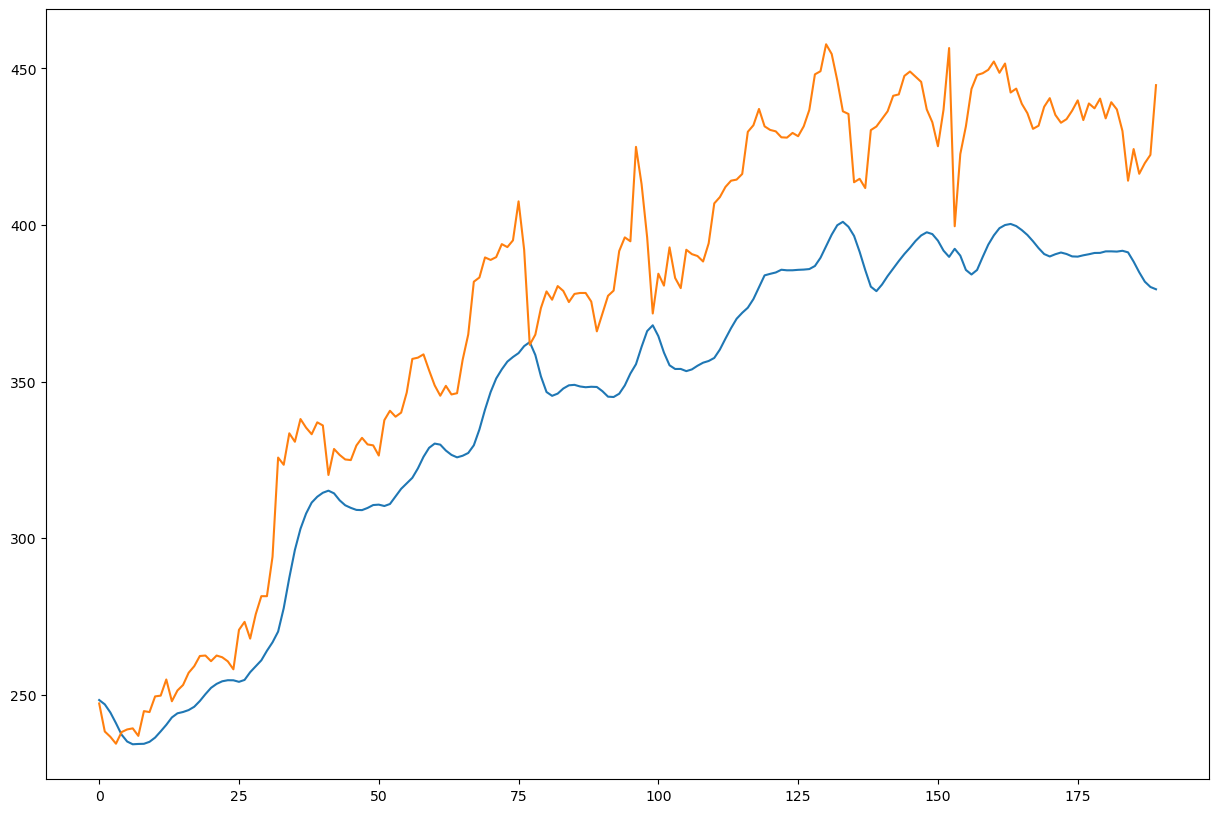

In [4]:
plt.figure(figsize=(15,10))
plt.plot(test_predictions)
plt.plot(y_test)

ERROR: Could not find a version that satisfies the requirement talib (from versions: none)
ERROR: No matching distribution found for talib
